In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
matplotlib.rcParams['figure.max_open_warning'] = 400
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import elasticite as el
import numpy as np
duration = el.get_default_args(el.EdgeGrid.render)['duration']

In [4]:
import sys
sys.path.append('..')
from scenario_line_fresnel import EdgeGrid
e = EdgeGrid(N_lame=25, grid_type='line')

In [5]:
e.lames.shape

(4, 31)

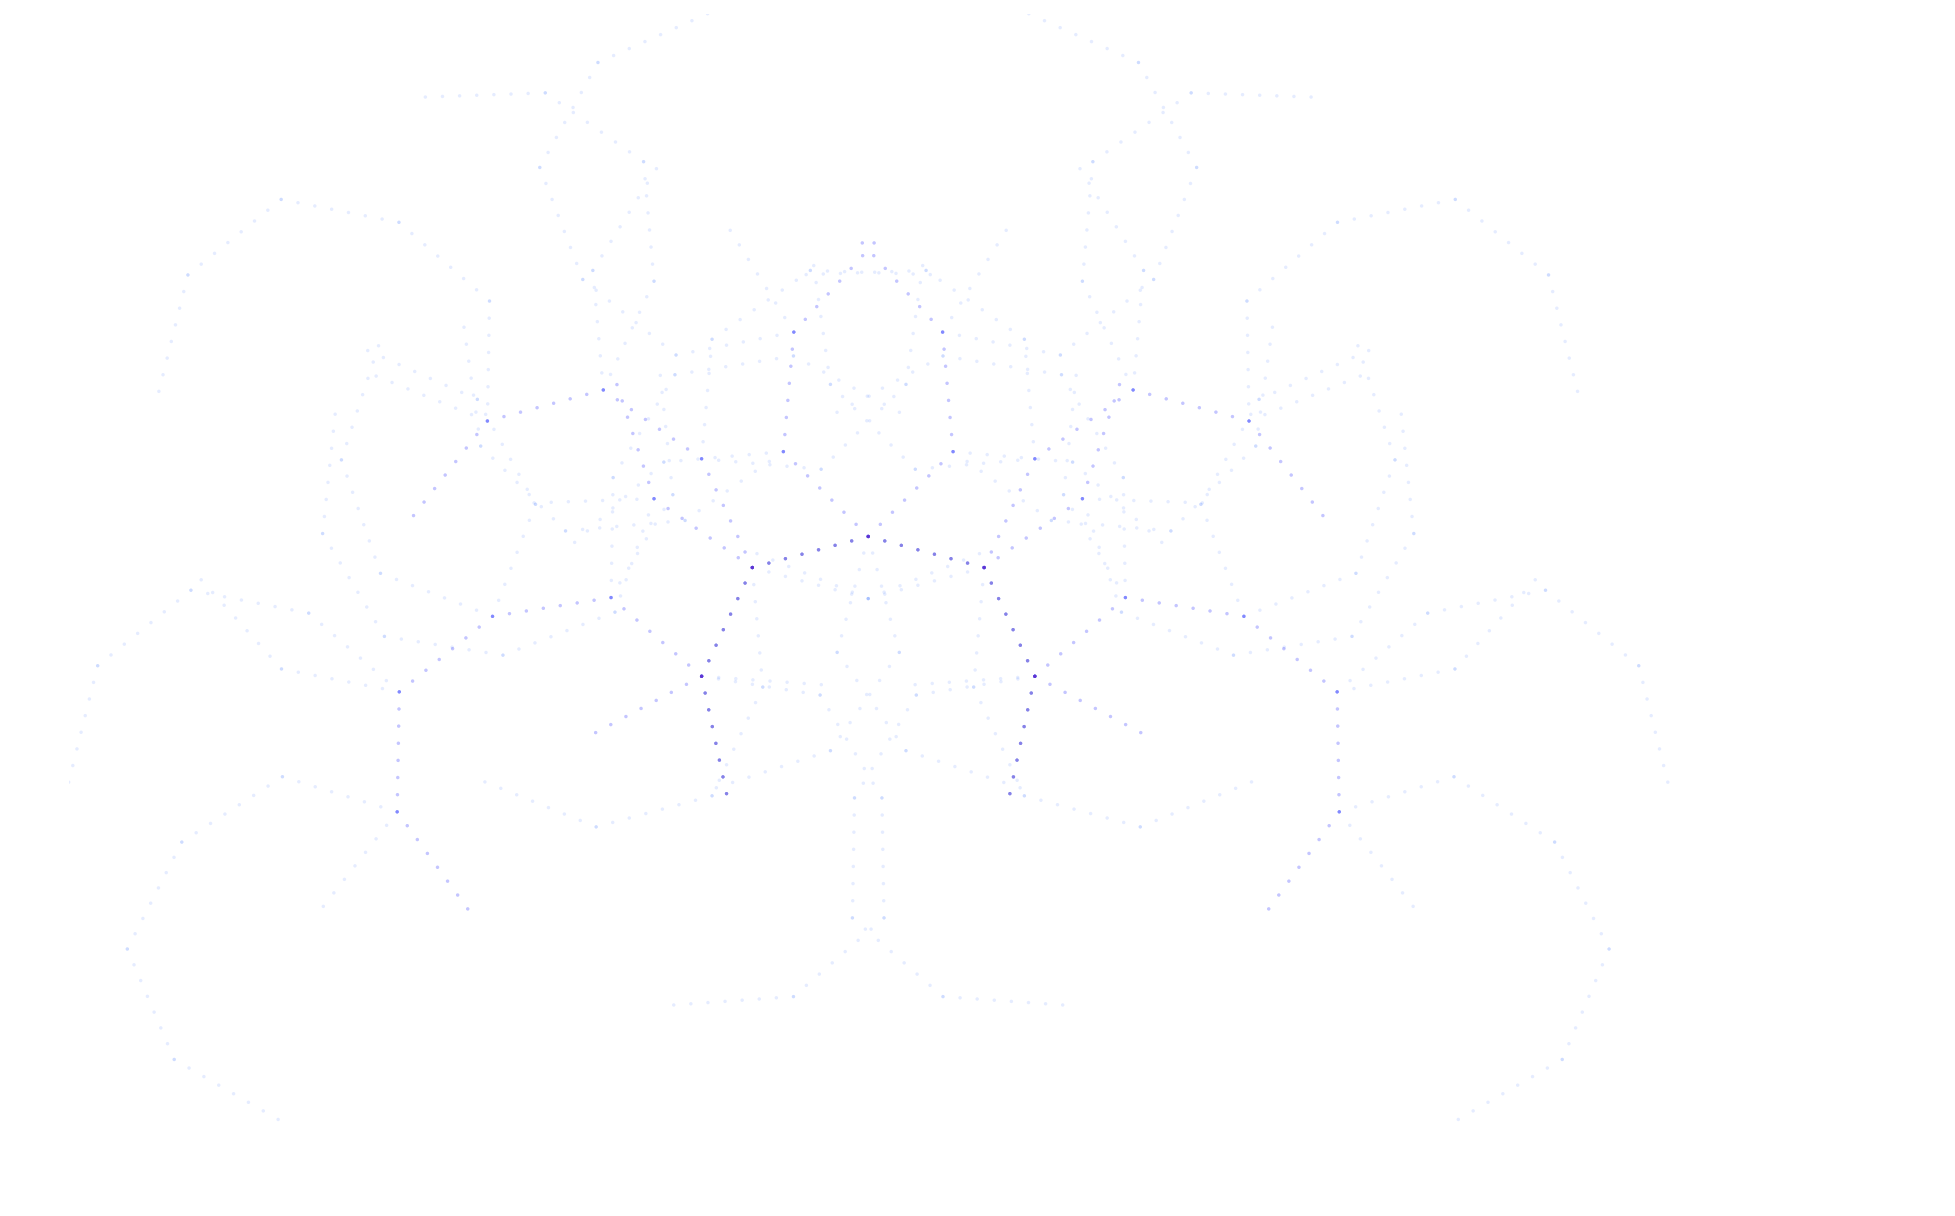

In [6]:
e = el.EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure(N_mirror=2, alpha = .5)
fig, ax = e.plot_structure()

In [7]:
e.particles.shape, e.N_particles, e.N_particles_per_lame

((3, 2352), 48, 8)

Greedy :

In [8]:
duration = el.get_default_args(el.EdgeGrid.render)['duration']
class EdgeGrid(el.EdgeGrid):
    def update(self, tau=.5):
        for i in range(14):
            ind_max = np.argmax(self.particles[2, :])
            self.particles[2, ind_max] = 0 # np.random.randn(self.particles.shape[1])
        #print (self.particles[2, :].min(), self.particles[2, :].max())
        self.particles[2, :] += self.dt/tau * (self.particles[2, :] - self.particles_ref)

e = EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure(N_mirror=2, alpha = .5)
e.particles_ref = e.particles[2, :].copy()
e.animate(scale = 32.)
#e.animate(fname='../files/expansion_foyers_greedy_12.mp4', scale = 32.)

  warn(skimage_deprecation('The `skimage.filter` module has been renamed '



TypeError: stat: can't specify None for path argument

In [ ]:
duration = el.get_default_args(el.EdgeGrid.render)['duration']
class EdgeGrid(el.EdgeGrid):
    def update(self, tau=.5):
        ind_max = np.argmax(self.particles[2, :])
        # TODO akin to pursuit
        #for i in range(14):
        #   
        #   self.particles[2, ind_max] = 0 # np.random.randn(self.particles.shape[1])
        #print (self.particles[2, :].min(), self.particles[2, :].max())
        self.particles[2, :] += self.dt/tau * (self.particles[2, :] - self.particles_ref)

e = EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure(N_mirror=2, alpha = .5)
e.particles_ref = e.particles[2, :].copy()
_ = e.animate(scale = 32.)
#e.animate(fname='../files/expansion_foyers_greedy_12.mp4', scale = 32.)

## git


In [ ]:
!git s

In [ ]:
!git commit -am' expansion - miroir de la structure - focus'

In [ ]:
!git commit -m' nb_pas '    ../src/elasticite.py


In [ ]:
! git push
